In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = "/content/drive/MyDrive/데이터분석기초/과제/데이터/"
temp = pd.read_csv(path + "기온.csv", header=0, encoding="euc-kr")
prec = pd.read_csv(path + "강수량.csv", header=0, encoding="euc-kr")
hum = pd.read_csv(path + "/습도.csv", header=0, encoding="euc-kr")

In [ ]:
temp = temp[["일시", "평균기온(℃)"]]
prec = prec[["일시", "강수량(mm)"]]
hum = hum[["일시", "평균습도(%rh)"]]

In [ ]:
temp_prec = pd.merge(temp, prec, on="일시")
wheather = pd.merge(temp_prec, hum, on="일시")

In [ ]:
wheather.head()

,일시,평균기온(℃),강수량(mm),평균습도(%rh)
0,Jan.12,-2.8,6.7,49
1,Feb.12,-2.0,0.8,43
2,Mar.12,5.1,47.4,52
3,Apr.12,12.3,157.0,54
4,May.12,19.7,8.2,48


In [ ]:
wheather["month"] = [a.split(".")[0] for a in wheather["일시"]]

In [ ]:
def season(x):
    if x in ["Mar","Apr","May"]:
        return 0
    elif x in ["Jun","Jul","Aug"]:
        return 1
    elif x in ["Sep","Oct","Nov"]:
        return 2
    elif x in ["Dec","Jan","Feb"]:
        return 3

In [ ]:
wheather.head()

,일시,평균기온(℃),강수량(mm),평균습도(%rh),month
0,Jan.12,-2.8,6.7,49,Jan
1,Feb.12,-2.0,0.8,43,Feb
2,Mar.12,5.1,47.4,52,Mar
3,Apr.12,12.3,157.0,54,Apr
4,May.12,19.7,8.2,48,May


In [ ]:
wheather.shape

(120, 5)

In [ ]:
#target 생성 (0: 봄, 1: 여름, 2: 가을, 3: 겨울)

wheather["target"] = wheather.apply(lambda x: season(x["month"]), axis=1)
wheather.head()

,일시,평균기온(℃),강수량(mm),평균습도(%rh),month,target
0,Jan.12,-2.8,6.7,49,Jan,3
1,Feb.12,-2.0,0.8,43,Feb,3
2,Mar.12,5.1,47.4,52,Mar,0
3,Apr.12,12.3,157.0,54,Apr,0
4,May.12,19.7,8.2,48,May,0


In [ ]:
wheather.groupby(by="target").describe().T

target                    0           1           2          3
평균기온(℃)   count   30.000000   30.000000   30.000000  30.000000
          mean    12.836667   25.493333   14.943333  -0.646667
          std      5.032137    1.782662    6.190464   1.944352
          min      5.100000   22.500000    5.500000  -4.100000
          25%      7.950000   23.950000    8.375000  -1.975000
          50%     13.150000   25.850000   15.600000  -0.650000
          75%     18.150000   26.800000   21.475000   1.000000
          max     19.700000   28.800000   23.100000   2.700000
강수량(mm)   count   30.000000   30.000000   30.000000  30.000000
          mean    70.153333  226.273333   76.423333  23.450000
          std     58.704360  181.059297   50.078605  19.400689
          min      7.200000   28.300000    0.000000   0.000000
          25%     26.925000   98.325000   40.900000   9.150000
          50%     48.450000  179.200000   68.150000  18.400000
          75%    112.025000  259.300000  103.275000  29.475000
          max    222.000000  676.200000  212.000000  74.100000
평균습도(%rh) count   30.000000   30.000000   30.000000  30.000000
          mean    54.500000   69.233333   62.166667  54.000000
          std      5.905871    6.931603    5.186743   5.099020
          min     45.000000   54.000000   54.000000  43.000000
          25%     51.000000   64.250000   58.000000  50.500000
          50%     54.000000   69.500000   61.000000  56.000000
          75%     58.750000   73.750000   65.000000  58.000000
          max     68.000000   85.000000   74.000000  62.000000

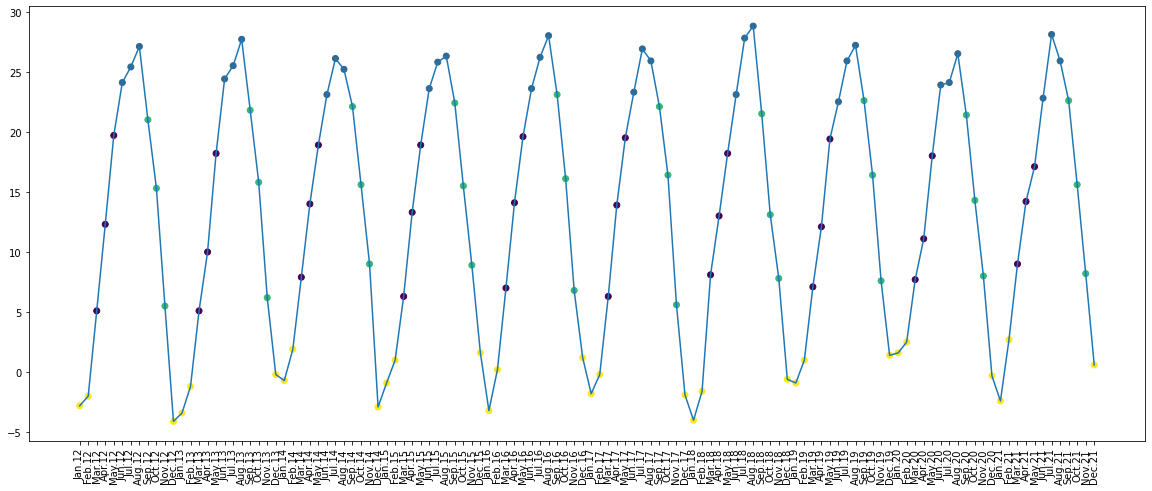

In [ ]:
#기온 그래프
plt.figure(figsize=(20,8))
plt.scatter(wheather.iloc[:,0], wheather.iloc[:,1], c=wheather["target"])
plt.plot(wheather.iloc[:,0], wheather.iloc[:,1])
plt.xticks(rotation=90)

plt.show()
#여름과 겨울 차이 극명하고, 봄과 가을은 비슷하게 나타난다.

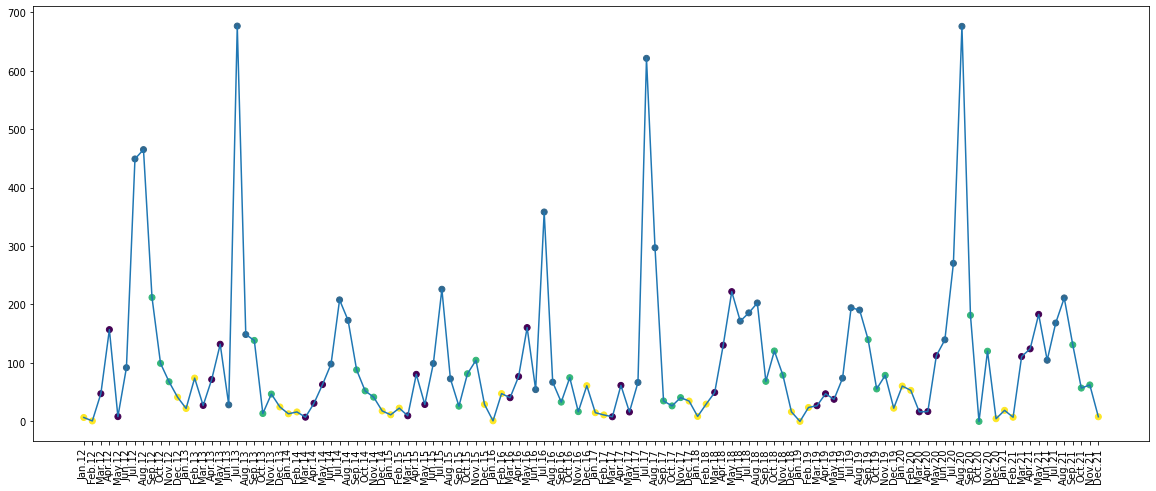

In [ ]:
#강수량
plt.figure(figsize=(20,8))
plt.scatter(wheather.iloc[:,0], wheather.iloc[:,2], c=wheather["target"])
plt.plot(wheather.iloc[:,0], wheather.iloc[:,2])
plt.xticks(rotation=90)

plt.show()
#겨울과 여름에 대한 강수량 차이는 극명하다. 하지만 봄, 가을이 겨울과 여름에 비해 뚜렷한 구분이 있다고 보기 어렵다. 

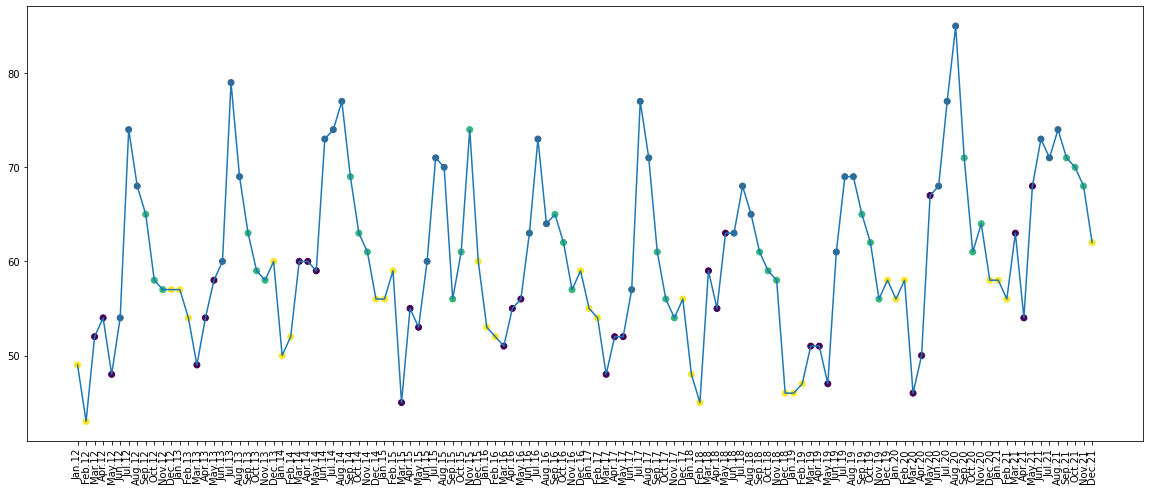

In [ ]:
#습도
plt.figure(figsize=(20,8))
plt.scatter(wheather.iloc[:,0], wheather.iloc[:,3], c=wheather["target"])
plt.plot(wheather.iloc[:,0], wheather.iloc[:,3])
plt.xticks(rotation=90)

plt.show()
#여름에 습도가 가장 높은 것으로 드러난다. 다른 계절은 비슷하지만 가을, 봄, 겨울 순으로 낮다. -> 하지만 뚜렷하게 구분되지 않아 클러스터링에 어려움을 겪을 것 예상 -> 평균으로 해봐야하는 이유(2)

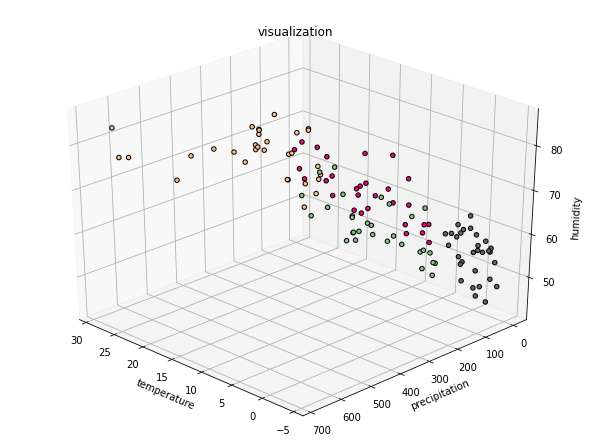

In [ ]:
#3차원 시각화 
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8,6))
ax = Axes3D(fig, elev=30, azim=135)
ax.scatter(wheather.iloc[:,1],
           wheather.iloc[:,2],
           wheather.iloc[:,3],
           c = wheather["target"],
           edgecolor="k",
           alpha=1,
           cmap="Accent")

ax.set_title("visualization")
ax.set_xlabel("temperature")
ax.set_ylabel("precipitation")
ax.set_zlabel("humidity")

plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = wheather.iloc[:,1:4]
y = wheather.iloc[:,-1]

In [ ]:
#scale이 제각각 -> 표준화 필요
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()   
X = scaler.fit_transform(X)
X

array([[0.03951368, 0.00990831, 0.14285714],
       [0.06382979, 0.00118308, 0.        ],
       [0.27963526, 0.0700976 , 0.21428571],
       [0.49848024, 0.23217983, 0.26190476],
       [0.72340426, 0.01212659, 0.11904762],
       [0.85714286, 0.13590654, 0.26190476],
       [0.89665653, 0.66385685, 0.73809524],
       [0.94832827, 0.68751849, 0.5952381 ],
       [0.76291793, 0.31351671, 0.52380952],
       [0.58966565, 0.14685004, 0.35714286],
       [0.29179331, 0.10026619, 0.33333333],
       [0.        , 0.06122449, 0.33333333],
       [0.0212766 , 0.03268264, 0.33333333],
       [0.0881459 , 0.10958296, 0.26190476],
       [0.27963526, 0.04037267, 0.14285714],
       [0.42857143, 0.10603372, 0.26190476],
       [0.67781155, 0.19520852, 0.35714286],
       [0.8662614 , 0.04185152, 0.4047619 ],
       [0.89969605, 1.        , 0.85714286],
       [0.96656535, 0.21975747, 0.61904762],
       [0.78723404, 0.20482106, 0.47619048],
       [0.60486322, 0.01996451, 0.38095238],
       [0.

In [ ]:
kmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300)
kmeans.fit(X)

KMeans(n_clusters=4)

In [ ]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0, 2, 2, 3, 0, 1, 1, 1, 1, 1, 0, 0, 3, 2, 3, 3, 0,
       1, 1, 1, 1, 0, 0, 0, 3, 3, 3, 3, 0, 0, 1, 1, 1, 1, 0, 0, 3, 3, 3,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 3, 2, 3, 3, 0, 1, 1, 1, 1, 1, 0, 0, 3,
       2, 3, 3, 0, 1, 1, 1, 1, 0, 0, 3, 3, 3, 3, 3, 0, 0, 1, 1, 1, 1, 0,
       0, 3, 3, 3, 3, 0, 0, 1, 1, 1, 1, 0, 3, 3, 3, 2, 3, 0, 0, 1, 1, 1,
       0, 0, 3, 3, 3, 3, 3, 3, 0, 1], dtype=int32)

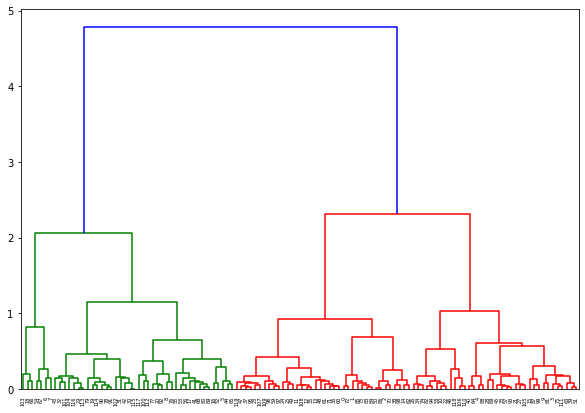

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
dend = shc.dendrogram(shc.linkage(X, method="ward"))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
cluster.fit_predict(X)

array([2, 2, 2, 1, 1, 0, 3, 3, 0, 1, 1, 2, 2, 2, 2, 1, 0, 0, 3, 0, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1, 0, 0, 0,
       0, 1, 1, 2, 2, 2, 2, 1, 0, 0, 3, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1, 0,
       3, 3, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1, 0, 0, 0, 3, 0, 1, 1, 2, 2, 2,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 2])

In [ ]:
#결과가 좋지않다. why? -> https://www.weather.go.kr/w/obs-climate/climate/korea-climate/korea-char.do 한국기후특성 
#4계절 뚜렷하지만 봄과 가을은 기온, 강수량, 습도 비슷하게 나타남을 알 수 있다. 앞서 나온 기온, 강수량, 습도 결과의 이유로 클러스터링의 결과가 좋지 않다고 생각
#2가지 방법 제시 1) (봄, 가을) / (여름) / (겨울) 로 clustering 진행(n_cluster=3) 2) 계절별 각 각 평균 구해서 클러스터링 진행

In [ ]:
#1)

kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300)
kmeans.fit(X)

KMeans(n_clusters=3)

In [ ]:
pred = kmeans.labels_

array([0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2,
       0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,
       2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2,
       2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[0.19831276, 0.0457569 , 0.2638484 ],
       [0.89933131, 0.39396037, 0.69238095],
       [0.66829655, 0.11936911, 0.39699793]])

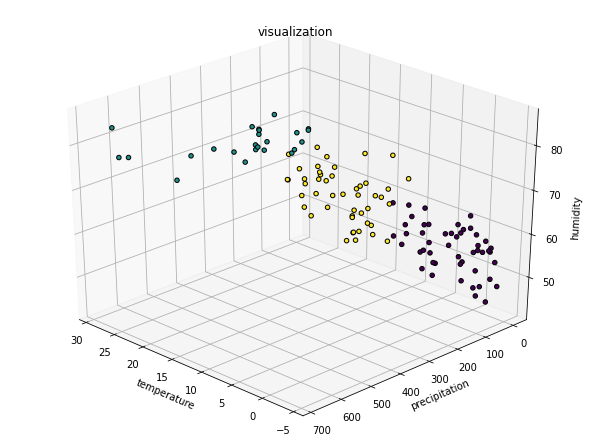

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig, elev=30, azim=135)
ax.scatter(wheather.iloc[:,1],
           wheather.iloc[:,2],
           wheather.iloc[:,3],
           c = pred,
           edgecolor="k",
           alpha=1)

ax.set_title("visualization")
ax.set_xlabel("temperature")
ax.set_ylabel("precipitation")
ax.set_zlabel("humidity")

plt.show()

In [ ]:
#결과 좋지 않음 -> 어느정도 비슷함을 보이고 있다. 

In [ ]:
wheather.head()

,일시,평균기온(℃),강수량(mm),평균습도(%rh),month,target,year
0,Jan.12,-2.8,6.7,49,Jan,3,12
1,Feb.12,-2.0,0.8,43,Feb,3,12
2,Mar.12,5.1,47.4,52,Mar,0,12
3,Apr.12,12.3,157.0,54,Apr,0,12
4,May.12,19.7,8.2,48,May,0,12


In [ ]:
wheather["year"] = [a.split(".")[1] for a in wheather["일시"]]

In [ ]:
wheather.head(12)

,일시,평균기온(℃),강수량(mm),평균습도(%rh),month,target,year
0,Jan.12,-2.8,6.7,49,Jan,3,12
1,Feb.12,-2.0,0.8,43,Feb,3,12
2,Mar.12,5.1,47.4,52,Mar,0,12
3,Apr.12,12.3,157.0,54,Apr,0,12
4,May.12,19.7,8.2,48,May,0,12
5,Jun.12,24.1,91.9,54,Jun,1,12
6,Jul.12,25.4,448.9,74,Jul,1,12
7,Aug.12,27.1,464.9,68,Aug,1,12
8,Sep.12,21.0,212.0,65,Sep,2,12
9,Oct.12,15.3,99.3,58,Oct,2,12


In [ ]:
grouped_w = wheather.groupby(by=["year", "target"]).mean()
#평균은 뚜렷하게 구분되는 양상을 띈다. 하지만 봄과 가을을 구분하기는 어렵다. 

In [ ]:
grouped_w = grouped_w.reset_index(level="target")

In [ ]:
grouped_w

,target,평균기온(℃),강수량(mm),평균습도(%rh)
year,,,,
12,0,12.366667,70.866667,51.333333
12,1,25.533333,335.233333,65.333333
12,2,13.933333,126.366667,60.000000
12,3,-2.966667,16.300000,49.666667
13,0,11.100000,77.000000,53.666667
13,1,25.866667,284.366667,69.333333
13,2,14.600000,66.266667,60.000000
13,3,-1.600000,40.300000,57.000000
14,0,13.600000,33.733333,59.666667


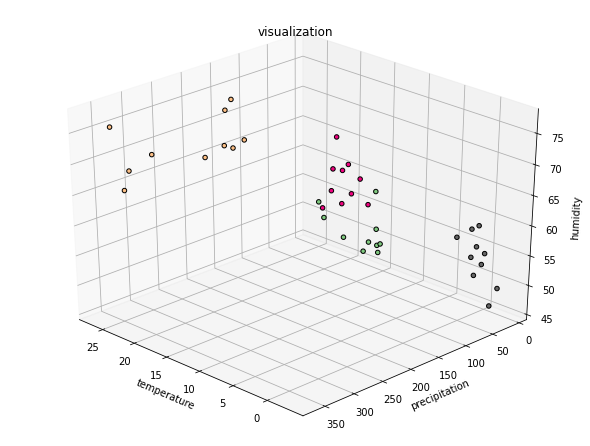

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8,6))
ax = Axes3D(fig, elev=30, azim=135)
ax.scatter(grouped_w.iloc[:,1],
           grouped_w.iloc[:,2],
           grouped_w.iloc[:,3],
           c = grouped_w["target"],
           edgecolor="k",
           alpha=1,
           cmap="Accent")

ax.set_title("visualization")
ax.set_xlabel("temperature")
ax.set_ylabel("precipitation")
ax.set_zlabel("humidity")

plt.show()

In [ ]:
grouped_X = grouped_w.iloc[:,1:4]

In [ ]:
#scale이 제각각 -> 표준화 필요
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()   
grouped_X = scaler.fit_transform(grouped_X)

In [ ]:
#n_cluster=4
kmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300)
kmeans.fit(grouped_X)

KMeans(n_clusters=4)

In [ ]:
labels = kmeans.labels_

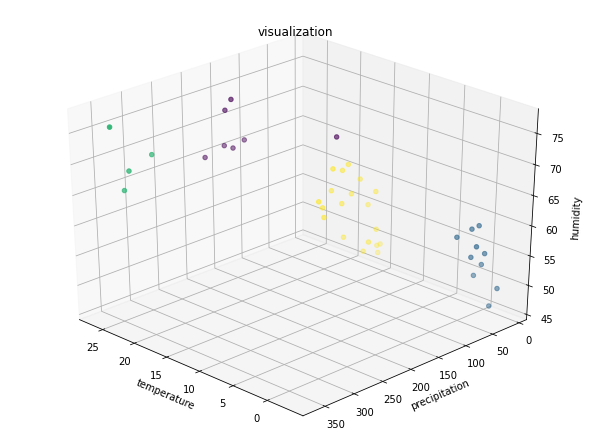

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8,6))
ax = Axes3D(fig, elev=30, azim=135)
ax.scatter(grouped_w.iloc[:,1],
           grouped_w.iloc[:,2],
           grouped_w.iloc[:,3],
           c = labels)

ax.set_title("visualization")
ax.set_xlabel("temperature")
ax.set_ylabel("precipitation")
ax.set_zlabel("humidity")

plt.show()

In [ ]:
#n_cluster=3
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300)
kmeans.fit(grouped_X)

KMeans(n_clusters=3)

In [ ]:
labels = kmeans.labels_

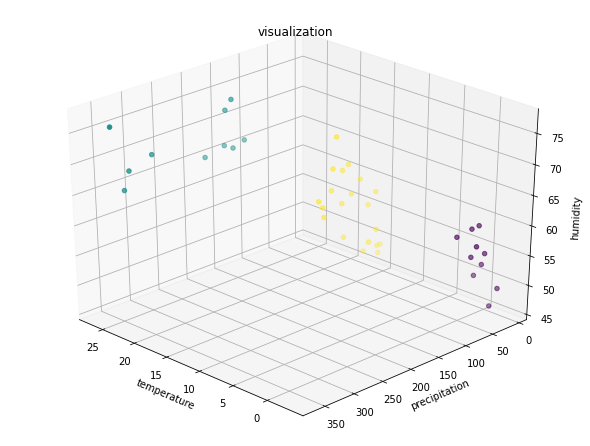

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8,6))
ax = Axes3D(fig, elev=30, azim=135)
ax.scatter(grouped_w.iloc[:,1],
           grouped_w.iloc[:,2],
           grouped_w.iloc[:,3],
           c = labels)

ax.set_title("visualization")
ax.set_xlabel("temperature")
ax.set_ylabel("precipitation")
ax.set_zlabel("humidity")

plt.show()